In [1]:
'''
帕累托分析（贡献度分析） → 帕累托法则：20/80定律
'''

'\n帕累托分析（贡献度分析） → 帕累托法则：20/80定律\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

A    3654.738687
B    3035.156706
C    2918.166294
D    1941.038217
E    5141.837043
F    3319.928556
G    4603.742615
H    3489.908140
I    3895.608409
J    3537.263745
dtype: float64
------
E    0.144688
G    0.274235
I    0.383855
A    0.486697
J    0.586233
H    0.684437
F    0.777858
B    0.863265
C    0.945380
D    1.000000
dtype: float64 <class 'pandas.core.series.Series'>
B <class 'str'>
超过80%累计占比的节点值索引为： B
超过80%累计占比的节点值索引位置为： 7
------
核心产品为：
E    5141.837043
G    4603.742615
I    3895.608409
A    3654.738687
J    3537.263745
H    3489.908140
F    3319.928556
B    3035.156706
dtype: float64


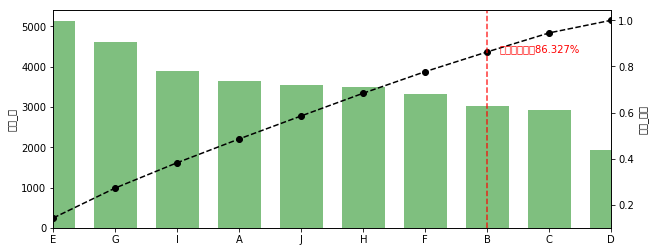

In [6]:
# 帕累托分布分析 

data = pd.Series(np.random.randn(10)*1200+3000,
                index = list('ABCDEFGHIJ'))
print(data)
print('------')
# 创建数据，10个品类产品的销售额

data.sort_values(ascending=False, inplace= True)
# 由大到小排列

plt.figure(figsize = (10,4))
data.plot(kind = 'bar', color = 'g', alpha = 0.5, width = 0.7)  
plt.ylabel('营收_元')
# 创建营收柱状图

p = data.cumsum()/data.sum()  # 创建累计占比，Series
print (p,type(p))
key = p[p>0.8].index[0] 
print (key,type(key))
key_num = data.index.tolist().index(key) 
print('超过80%累计占比的节点值索引为：' ,key)
print('超过80%累计占比的节点值索引位置为：' ,key_num)
print('------')
# 找到累计占比超过80%时候的index
# 找到key所对应的索引位置

p.plot(style = '--ko', secondary_y=True)  # secondary_y → y副坐标轴
plt.axvline(key_num,hold=None,color='r',linestyle="--",alpha=0.8)  
plt.text(key_num+0.2,p[key],'累计占比为：%.3f%%' % (p[key]*100), color = 'r')  # 累计占比超过80%的节点
plt.ylabel('营收_比例')
# 绘制营收累计占比曲线

key_product = data.loc[:key]
print('核心产品为：')
print(key_product)
# 输出决定性因素产品